In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

In [17]:
np.unique(y_data)

array([0, 1])

In [19]:
# label에 편향되어 있는지 확인

# ex) 신용불량자 or 암환자와 같이 원래 편향되어 있는 데이터도 있음
# 일반적으로 균일하게 맞추어주어야함
uniqueData = np.unique(y_data,return_counts=True)

In [20]:
uniqueData[0], uniqueData[1]

(array([0, 1]), array([5, 7], dtype=int64))

In [21]:
uniqueData[1][0] / np.sum(uniqueData[1])

0.4166666666666667

In [22]:
uniqueData[1][1] / np.sum(uniqueData[1])

0.5833333333333334

값 :  a 비율 :  0.2222222222222222
값 :  b 비율 :  0.2222222222222222
값 :  c 비율 :  0.5555555555555556


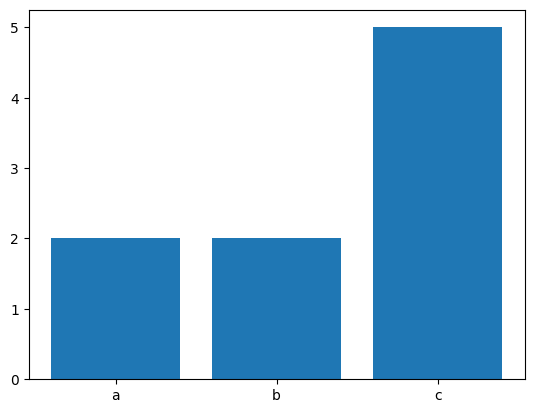

In [26]:
def un(y_data):
    import numpy as np
    import matplotlib.pyplot as plt

    uniqueData = np.unique(y_data,return_counts=True)

    for i in range(len(uniqueData[0])):
        print("값 : ",uniqueData[0][i], "비율 : ", uniqueData[1][i] / np.sum(uniqueData[1]))

    plt.bar(uniqueData[0],uniqueData[1])
    plt.show()

un('a,b,c,a,b,c,c,c,c'.split(","))

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.3, 
                                                    random_state=777,
                                                    stratify=y_data)
# test size : 0.1 or 0.2 or 0.3 정답은 없음
# train 데이터로 test 하지 않는 것이 원칙 
# stratify : 기존 데이터를 나누는 것에 그치는 것이 아니라 클래스 분포 비율까지 맞춰 준다.
#           * 분류 시 stratify = True 권장

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.3) 
                                                    # random_state=777,
                                                    # stratify=y_data)
np.unique(y_train,return_counts=True), np.unique(y_test,return_counts=True)

((array([0, 1]), array([3, 5], dtype=int64)),
 (array([0, 1]), array([2, 2], dtype=int64)))

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape,

((8, 2), (4, 2), (8,), (4,))

값 :  2 비율 :  0.25
값 :  3 비율 :  0.125
값 :  4 비율 :  0.125
값 :  5 비율 :  0.125
값 :  6 비율 :  0.125
값 :  9 비율 :  0.125
값 :  12 비율 :  0.125


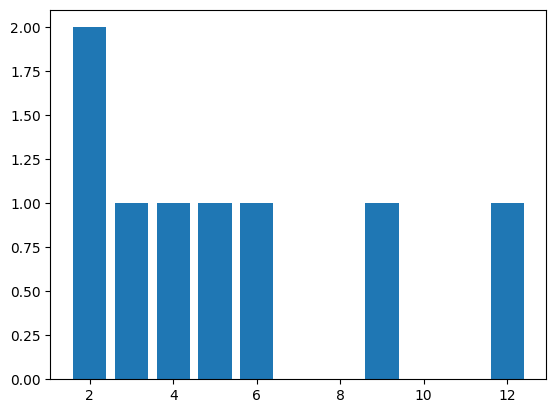

In [38]:
un(x_test)

값 :  0 비율 :  0.5
값 :  1 비율 :  0.5


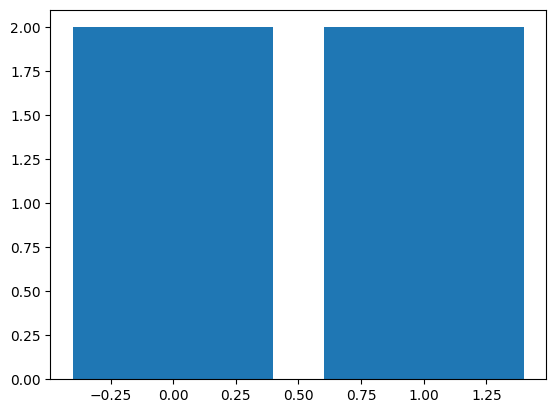

In [39]:
un(y_test)

In [44]:
# penalty = 'none' => 이항 or 다항 알아서 함
model = LogisticRegression(penalty='none')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
result = y_predict == y_train
np.unique(result,return_counts=True)

c:\Users\user\miniconda3\envs\py\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_17028\3051173910.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  result = y_predict == y_train


(array([False]), array([1], dtype=int64))

# 선형 회귀 시

In [5]:
model = LinearRegression()
model.fit(x_data,y_data)
print(model.coef_, model.intercept_)

[0.14726495 0.03377002] -0.3717131697471452


In [6]:
x_data[:,0]

array([2, 3, 3, 5, 7, 2, 8, 9, 6, 9, 6, 2])

In [11]:
y_predict = model.predict(x_data)
y_predict

array([-0.04341326,  0.13762171,  0.20516175,  0.53346166,  0.82799155,
        0.09166682,  1.11033658,  1.29137154,  0.91711675,  1.02121139,
        0.84957671,  0.0578968 ])

In [15]:
# x0 = x_data[:,0]*model.coef_
# x1 = x_data[:,1]*model.coef_

# y 예측값 = x0 결과 + x1 결과 + model.intercept_

x_data[:,0]*model.coef_[0]+x_data[:,1]*model.coef_[1]+model.intercept_

array([-0.04341326,  0.13762171,  0.20516175,  0.53346166,  0.82799155,
        0.09166682,  1.11033658,  1.29137154,  0.91711675,  1.02121139,
        0.84957671,  0.0578968 ])